# A/B TESTING

<img src="https://www.scaler.com/topics/images/a-b-testing-example.webp">

* A/B Testing, pazarlama stratejileri,tasarımları veya temaları karşılaştırmak için kullanılan bir data science tekniği. Bu testlerde amaç yapılan işten daha iyi sonuçlar almak için datanın gücünden yararlanarak doğru kararlar vermektir. Bu data da bir **book store** un online kullanıcı etkileşimini artırarak, yaptığı web sitesinin tasarımını optimize edeceğiz, kullanıcılara **Ligt Teheme** ve **Light Theme** olmak üzere iki tema sunuluyor, hangi temalar kullanıcı etkileşimini artırıp **Purchases** değerlerini etkiliyor, veya **conversation rate** yani hangi tema da kullanıcılar siteye daha çok üye oluyor bunlara bakacağız.

### Data Dictionary

- **Theme**: Karanlık veya aydınlık.
- **Click Through Rate**: Web sitesindeki bağlantılara veya butonlara tıklayan kullanıcıların oranı.
- **Conversion Rate**: İlk kez ziyaret eden kullanıcıların platforma kaydolma yüzdesi.
- **Bounce Rate**: Tek bir sayfayı ziyaret ettikten sonra web sitesinden ayrılan kullanıcıların yüzdesi.
- **Scroll Depth**: Kullanıcıların web sitesi sayfalarında kaydırdığı derinlik.
- **Age**: Kullanıcının yaşı.
- **Location**: Kullanıcının bulunduğu yer.
- **Session Duration**: Kullanıcının web sitesindeki oturum süresi.
- **Purchases**: Kullanıcının kitabı satın alıp almadığı (Evet/Hayır).
- **Added_to_Cart**: Kullanıcının kitapları sepete ekleyip eklemediği (Evet/Hayır).t/Hayır).

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

In [3]:
df=pd.read_csv("ab_test.csv")

In [4]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [7]:
df.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [8]:
del df ['Location']  # bu sutunun gwrekesiz olduğunu düşünüyorum

## Data Visualization

* Dark temada satışların nasıl olduğunu gösteriyor

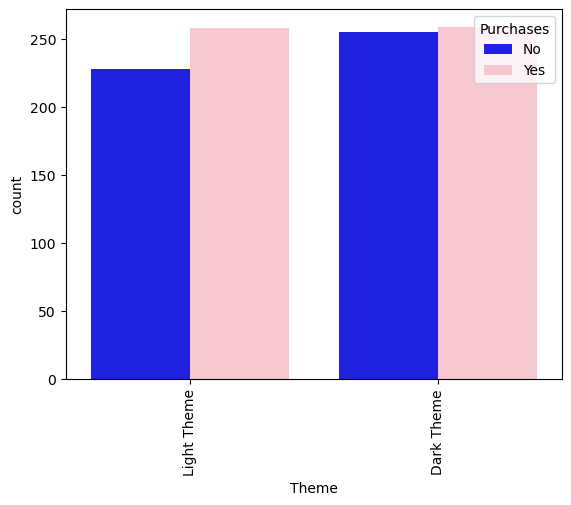

In [13]:
color = {'No': 'blue', 'Yes': 'pink'}
sns.countplot(x=df["Theme"], hue=df["Purchases"], palette=renkler)
plt.xticks(rotation=90);

<Axes: xlabel='Age', ylabel='count'>

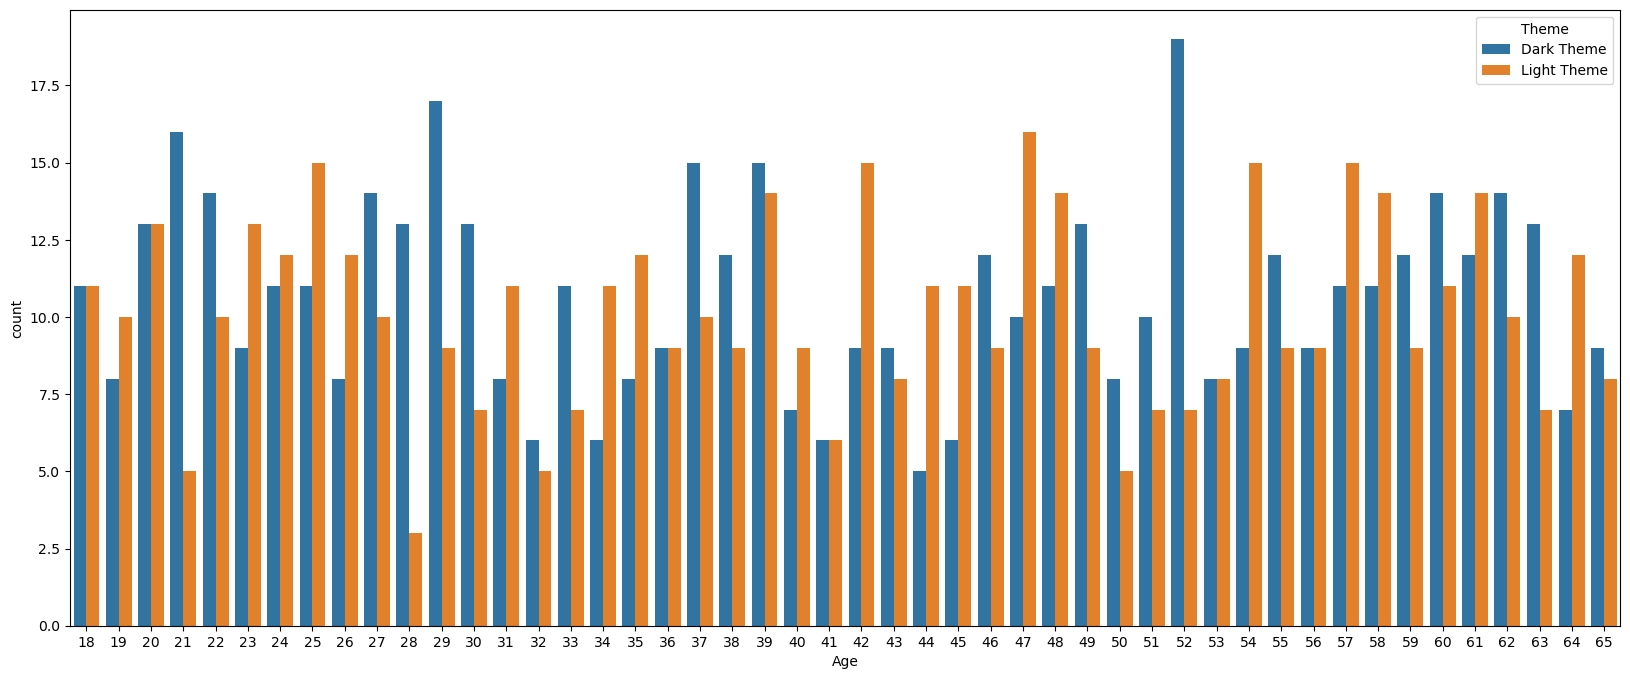

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'],hue=df['Theme'])

<Axes: ylabel='count'>

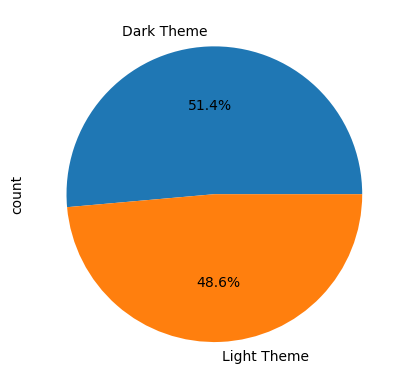

In [16]:
df['Theme'].value_counts().plot.pie(autopct='%1.1f%%')
# Theme neredeyse eşit gibi,az fark var.

* Burada **Light Theme** ve **Dark Theme** kullananların **Conversation Rate** oranına baktık, yani hangi temeyı kullanalar siteye kayıt olmuş, üye olmuş, bu, web sitesinin ne kadar etkili olduğu, kullanıcıların içerikle ne kadari lgileneip ilgilenmediği şeyleri görmek için önemli bir göstergedir. Sonuçları grafikle görselleştirdik. 

In [20]:
light_theme = df[df['Theme'] == 'Light Theme']['Conversion Rate']
dark_theme = df[df['Theme'] == 'Dark Theme']['Conversion Rate']

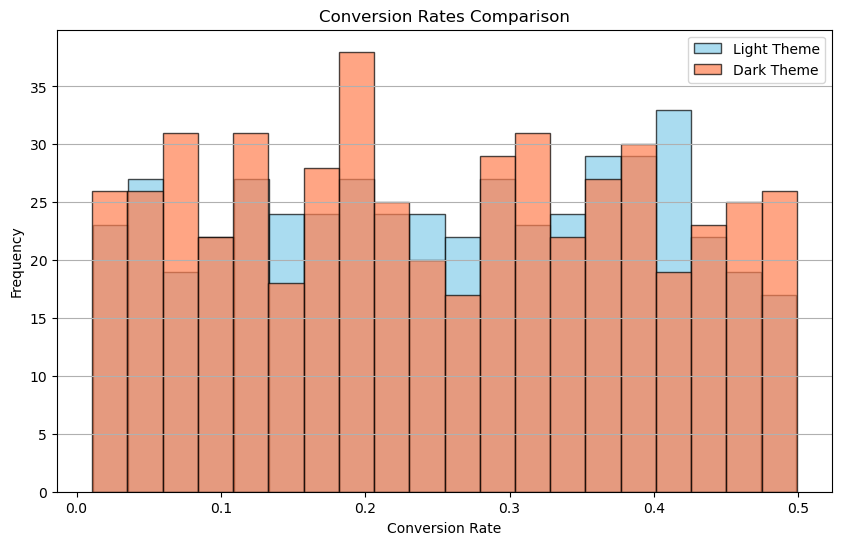

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(light_theme, bins=20, alpha=0.7, label='Light Theme', color='skyblue', edgecolor='black')
plt.hist(dark_theme, bins=20, alpha=0.7, label='Dark Theme', color='coral', edgecolor='black')
plt.title('Conversion Rates Comparison')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.show()

* P-Value bakacaktım ama datma obj olduğu için **chi-square test** yani ki-kare tesi yapacağım. Önce **crosstab** ile **theme** ve **purchases** arasındaki ilişkiye bakacağız sonra testin sonucu olarak **ki-kare** ve p-value bakacağız, 0.05 ten küçükse ikisi arasında ilişki var denektir.

In [25]:
contingency_table = pd.crosstab(df['Theme'], df['Purchases'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(f"Ki-kare istatistiği: {chi2}, P-değeri: {p_value}")

Ki-kare istatistiği: 0.6238119337882984, P-değeri: 0.4296342647705996


* P-değeri 0.05 ten küçük, yani **Theme** ve **Purchases** arasında bir alaka yok, tema, kullanıcıların satın alma durumunu etkilemiyor. **ki-kare** sonucu da destekliyor bunu.